In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
# Load the dataset
df = pd.read_csv(r'H:\Harsha\Study\Machine Learning\Department of Building safety violations\DOB_Safety_Violations.csv')

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Drop columns with a high number of missing values (optional)
if 'Violation Remarks' in df.columns:
    df.drop('Violation Remarks', axis=1, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

In [17]:
df.describe()

,BIN,Block,Lot,Postcode,Latitude,Longitude,Community Board,Council District,BBL,Census Tract (2020)
count,5.824170e+05,582417.000000,582417.000000,582417.000000,582417.000000,582417.000000,582417.000000,582417.000000,5.824170e+05,582417.000000
mean,2.642573e+06,3112.003499,676.595805,10773.723760,40.726881,-73.937707,259.947459,23.466588,2.558931e+09,7077.452748
std,1.239380e+06,2907.520127,2087.915856,568.456877,0.072234,0.067562,118.138329,15.349884,1.191529e+09,19445.585662
min,1.000003e+06,1.000000,1.000000,10000.000000,40.499227,-74.253134,101.000000,1.000000,0.000000e+00,1.000000
25%,1.081017e+06,1131.000000,10.000000,10035.000000,40.677654,-73.981939,110.000000,8.000000,1.018760e+09,135.000000
50%,3.046515e+06,2080.000000,32.000000,11203.000000,40.721650,-73.948233,303.000000,25.000000,3.013830e+09,319.000000
75%,3.339621e+06,4432.000000,58.000000,11226.000000,40.771902,-73.905885,316.000000,37.000000,3.068780e+09,936.000000
max,5.862927e+06,27000.000000,9999.000000,11697.000000,40.912886,-73.700384,595.000000,51.000000,5.270001e+09,157903.000000


In [18]:
df.head()

,BIN,Violation Issue Date,Violation Number,Violation Type,Violation Status,Device Number,Device Type,Cycle End Date,Borough,Block,...,City,State,Postcode,Latitude,Longitude,Community Board,Council District,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,3116942,01/06/2006,010606LL629112840,LL6291,Active,30000070181Y0001,Boiler,12/31/2005,Brooklyn,5091.0,...,New York,New York,11226.0,40.651182,-73.952513,317.0,40.0,3.050910e+09,820.0,East Flatbush-Erasmus
1,4233155,03/01/2013,030113LBLVIO15727,LBLVIO,Active,40000054750N0001,Boiler,11/15/2011,Queens,10898.0,...,New York,New York,11412.0,40.706401,-73.759408,412.0,27.0,4.108980e+09,506.0,Hollis
2,3205018,06/20/2023,062023LBLVIO39206,LBLVIO,Active,30000041009Y0001,Boiler,12/31/2019,Brooklyn,7463.0,...,New York,New York,11235.0,40.586050,-73.950924,315.0,48.0,3.074630e+09,600.0,Sheepshead Bay-Manhattan Beach-Gerritsen Beach
3,4238340,01/06/2006,010606LL629122660,LL6291,Active,40000074513N0001,Boiler,12/31/2005,Queens,11066.0,...,New York,New York,11412.0,40.693003,-73.757516,412.0,27.0,4.110660e+09,528.0,St. Albans
4,2021170,06/20/2023,062023LBLVIO31057,LBLVIO,Active,20000164250N0001,Boiler,12/31/2019,Bronx,3510.0,...,New York,New York,10473.0,40.816277,-73.848467,209.0,18.0,2.035100e+09,84.0,Castle Hill-Unionport


In [19]:
# Checking the data shape
shape_of_data = df.shape
print(shape_of_data)

(582417, 23)


In [20]:
# Null values checking
df.isna()
df.isna().sum()

BIN                                          0
Violation Issue Date                         0
Violation Number                             0
Violation Type                               0
Violation Status                             0
Device Number                                0
Device Type                                  0
Cycle End Date                               0
Borough                                      0
Block                                        0
Lot                                          0
House Number                                 0
Street                                       0
City                                         0
State                                        0
Postcode                                     0
Latitude                                     0
Longitude                                    0
Community Board                              0
Council District                             0
BBL                                          0
Census Tract 

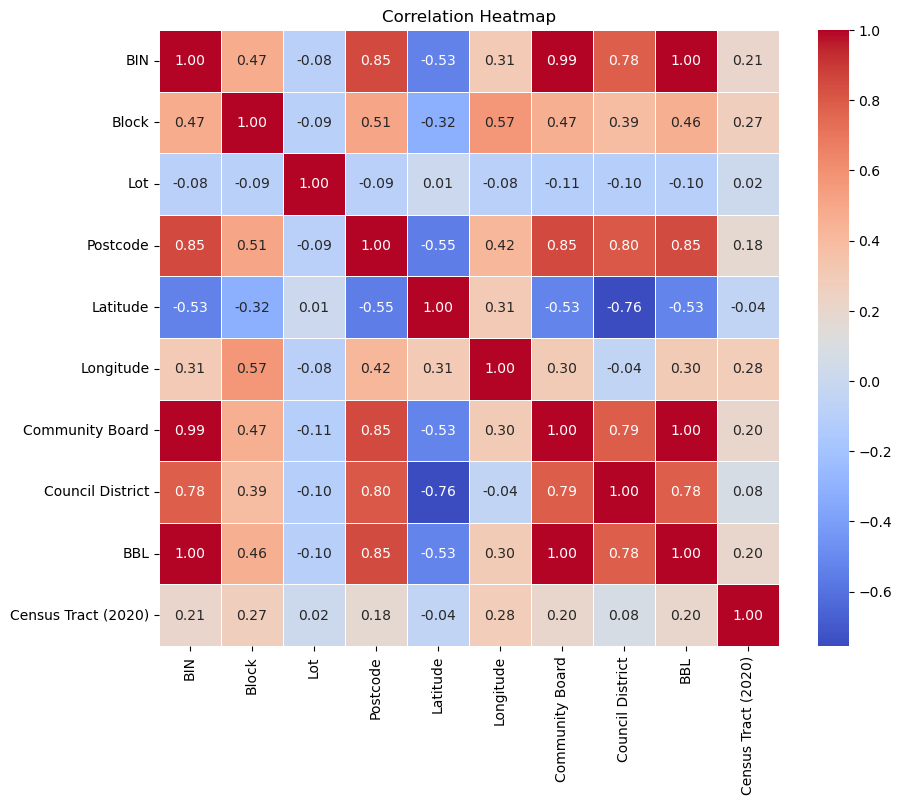

In [21]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

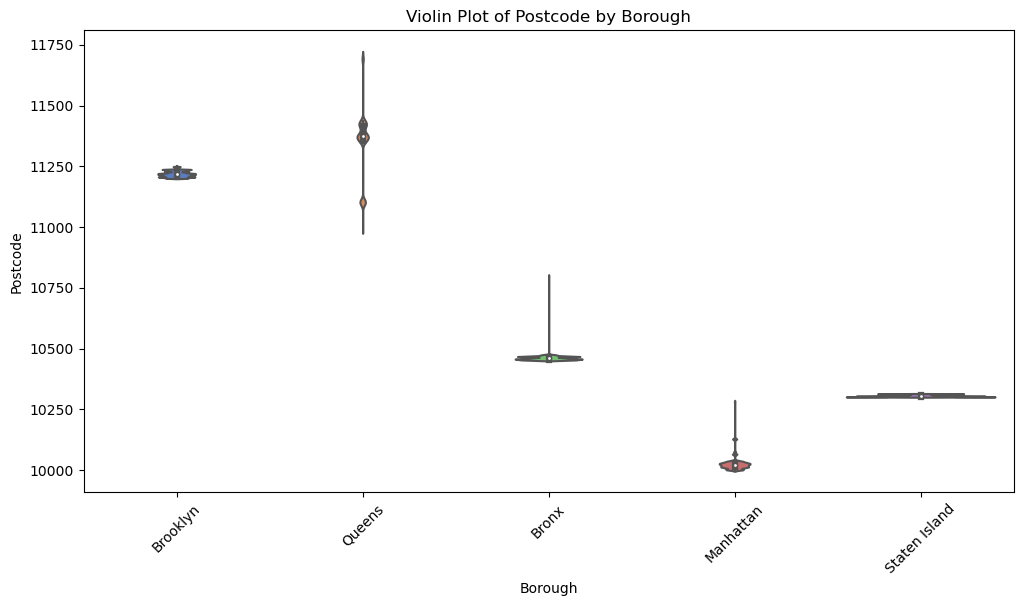

In [22]:
plt.figure(figsize=(12, 6))

# Violin plot for a numerical feature (e.g., Postcode) across different categories (e.g., Borough)
sns.violinplot(x='Borough', y='Postcode', data=df, palette='muted')
plt.title('Violin Plot of Postcode by Borough')
plt.xticks(rotation=45)
plt.show()

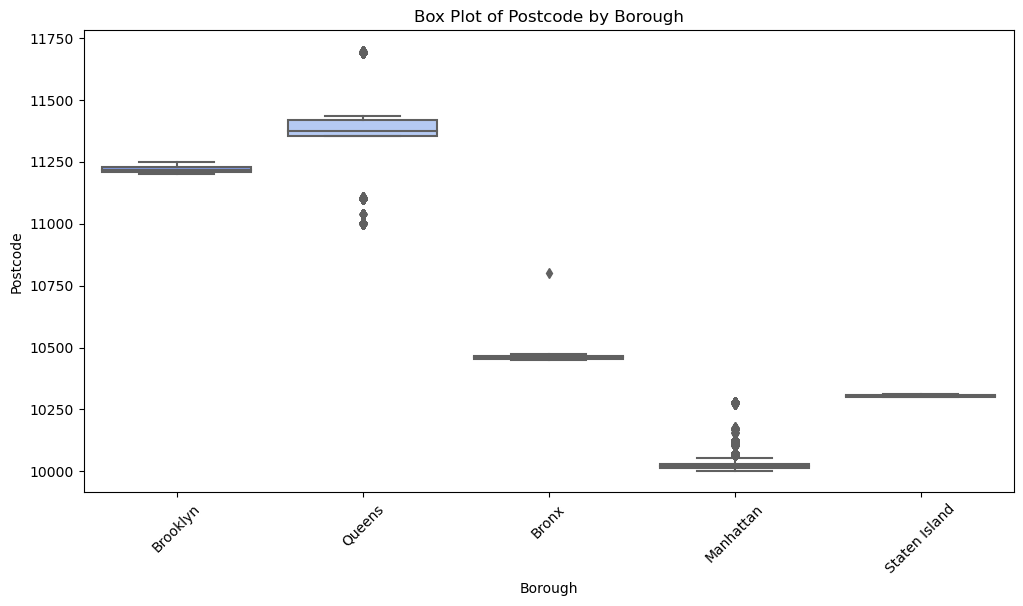

In [23]:
plt.figure(figsize=(12, 6))

# Box plot for a numerical feature (e.g., Postcode) across different categories (e.g., Borough)
sns.boxplot(x='Borough', y='Postcode', data=df, palette='coolwarm')
plt.title('Box Plot of Postcode by Borough')
plt.xticks(rotation=45)
plt.show()

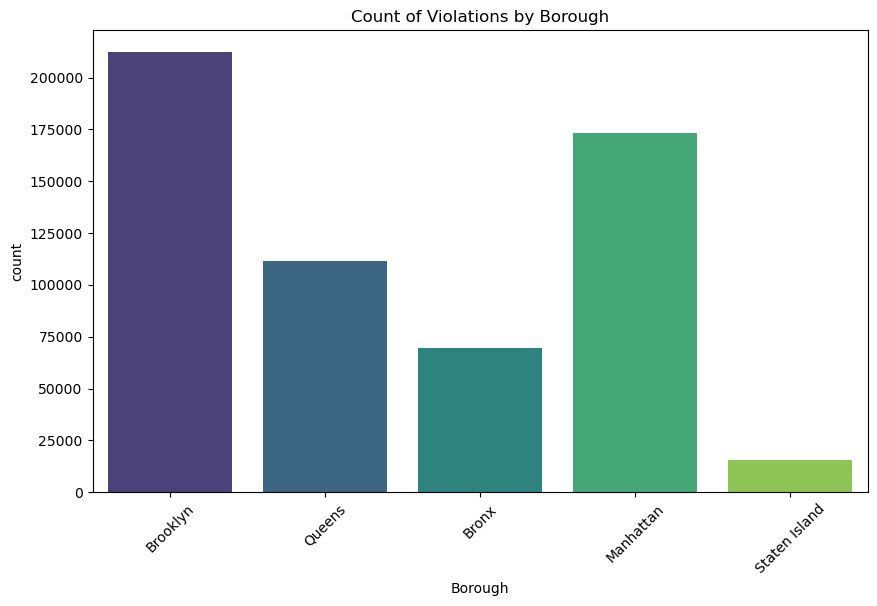

In [24]:
plt.figure(figsize=(10, 6))

# Bar plot for counting occurrences in a categorical feature (e.g., Borough)
sns.countplot(x='Borough', data=df, palette='viridis')
plt.title('Count of Violations by Borough')
plt.xticks(rotation=45)
plt.show()

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


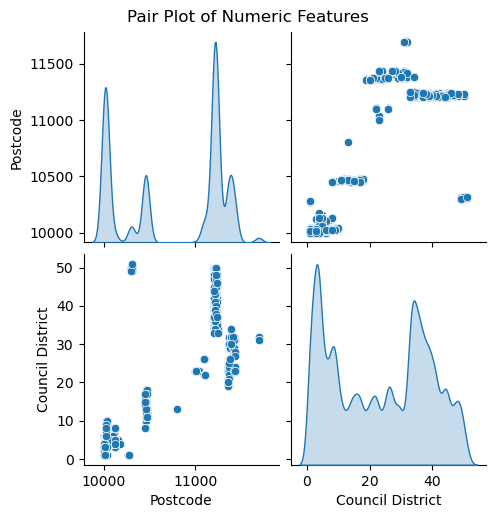

In [25]:
# Select a subset of numeric features for the pair plot
numeric_subset = df[['Postcode', 'Council District', 'House Number']]

# Create a pair plot
sns.pairplot(numeric_subset, diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

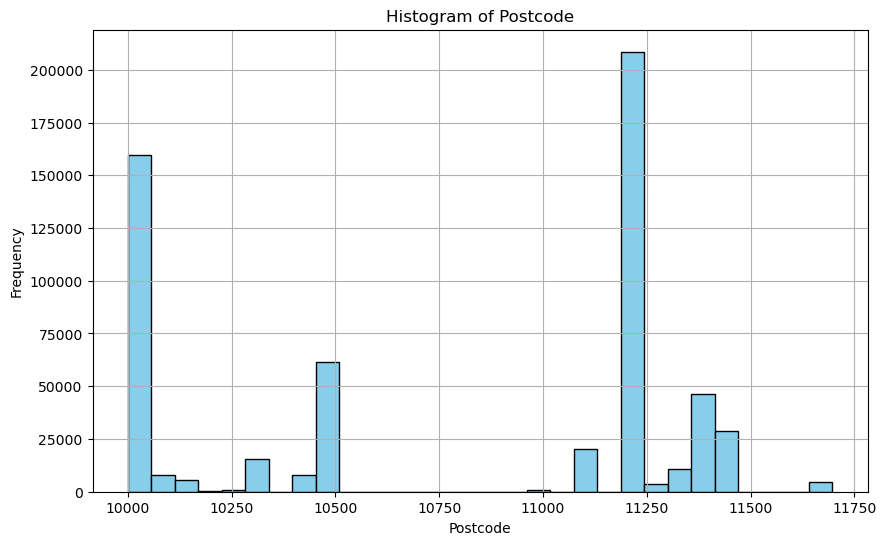

In [26]:
plt.figure(figsize=(10, 6))

# Histogram for a numeric feature (e.g., Postcode)
df['Postcode'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Postcode')
plt.xlabel('Postcode')
plt.ylabel('Frequency')
plt.show()

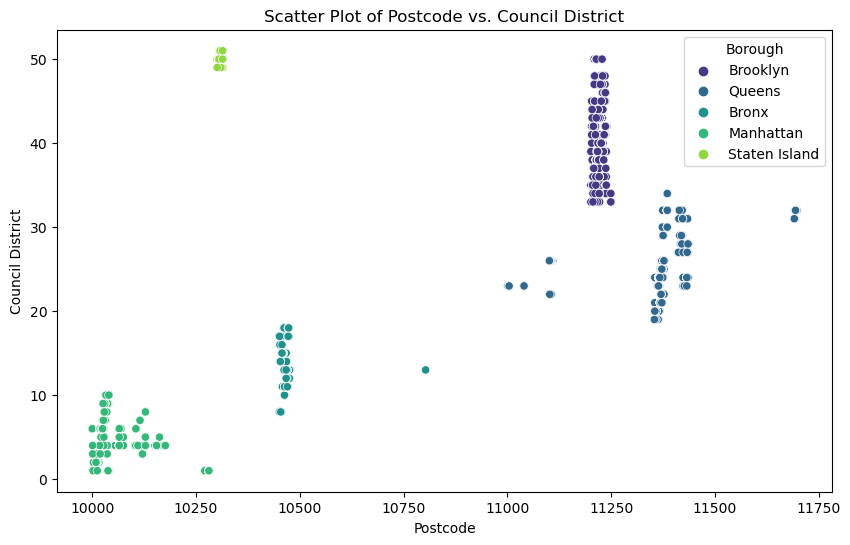

In [27]:
plt.figure(figsize=(10, 6))

# Scatter plot between two numeric features (e.g., Postcode vs. Council District)
sns.scatterplot(x='Postcode', y='Council District', data=df, hue='Borough', palette='viridis')
plt.title('Scatter Plot of Postcode vs. Council District')
plt.xlabel('Postcode')
plt.ylabel('Council District')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_15600\1571426709.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Postcode'], shade=True, color='r')


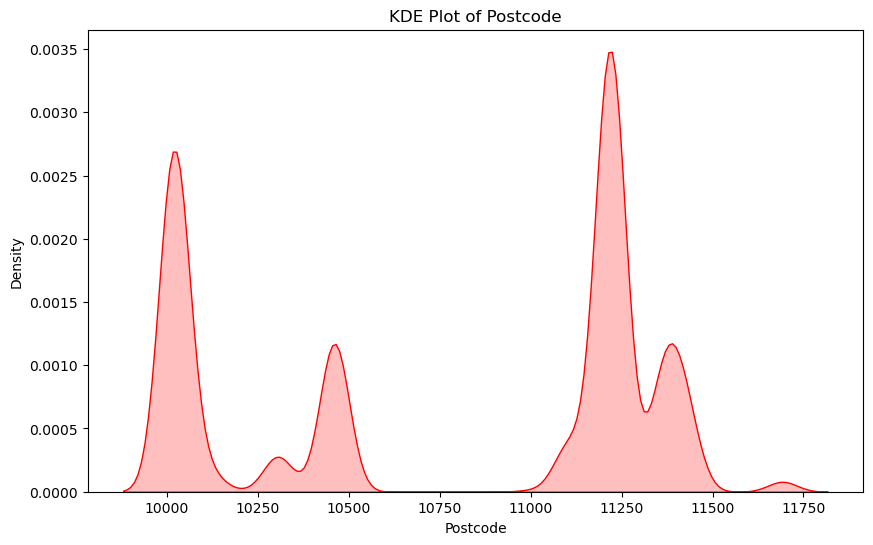

In [28]:
plt.figure(figsize=(10, 6))

# KDE plot for a numeric feature (e.g., Postcode)
sns.kdeplot(df['Postcode'], shade=True, color='r')
plt.title('KDE Plot of Postcode')
plt.xlabel('Postcode')
plt.ylabel('Density')
plt.show()

In [29]:
# Selecting relevant features (Example: Postcode and Council District)
X = numeric_columns[['Postcode']]  # Feature(s)
y = numeric_columns['Council District']  # Target

In [30]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform the feature(s)
X_scaled = scaler.fit_transform(X)

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression R-squared:", r2_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

Linear Regression R-squared: 0.6407875385374646
Linear Regression Mean Squared Error: 84.90402430679865


In [33]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree R-squared:", r2_dt)
print("Decision Tree Mean Squared Error:", mse_dt)

Decision Tree R-squared: 0.9925198547968073
Decision Tree Mean Squared Error: 1.768018925525216


In [34]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest R-squared:", r2_rf)
print("Random Forest Mean Squared Error:", mse_rf)

Random Forest R-squared: 0.9925200618499644
Random Forest Mean Squared Error: 1.7679699861142157


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Gradient Boosting R-squared:", r2_gb)
print("Gradient Boosting Mean Squared Error:", mse_gb)

Gradient Boosting R-squared: 0.985377870694513
Gradient Boosting Mean Squared Error: 3.4561095595501885


               Model  R-squared        MSE
0  Linear Regression   0.640788  84.904024
1      Decision Tree   0.992520   1.768019
2      Random Forest   0.992520   1.767970
3  Gradient Boosting   0.985378   3.456110


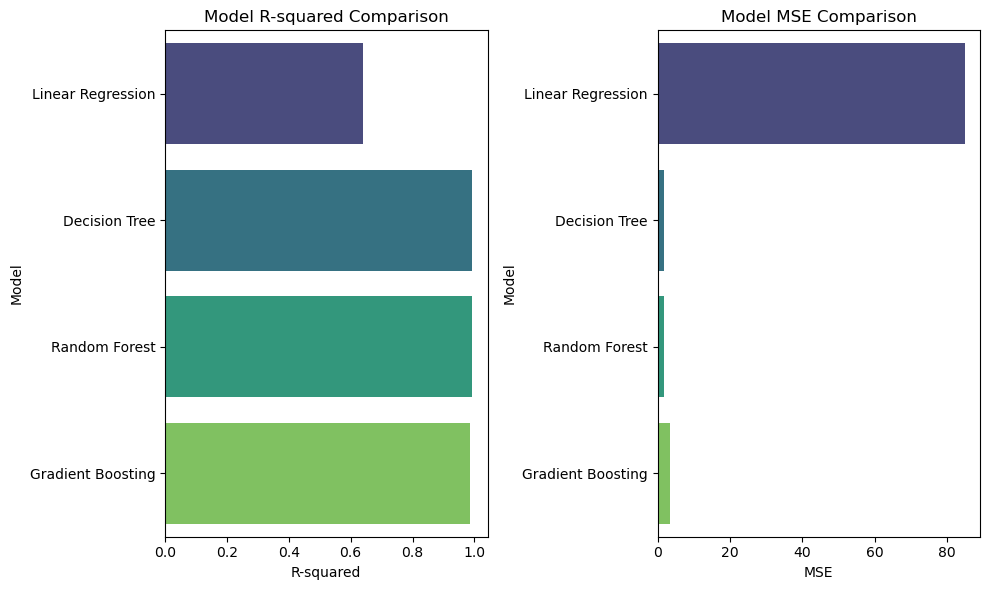

In [36]:
# Create a DataFrame to compare the models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'R-squared': [r2_lr, r2_dt, r2_rf, r2_gb],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb]
})

# Print the comparison table
print(model_comparison)

# Plotting the comparison
plt.figure(figsize=(10, 6))

# R-squared comparison
plt.subplot(1, 2, 1)
sns.barplot(x='R-squared', y='Model', data=model_comparison, palette='viridis')
plt.title('Model R-squared Comparison')

# MSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x='MSE', y='Model', data=model_comparison, palette='viridis')
plt.title('Model MSE Comparison')

plt.tight_layout()
plt.show()